C:\Users\2018\AppData\Local\Temp\ipykernel_16668\28857827.py:80: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-X))
C:\Users\2018\AppData\Local\Temp\ipykernel_16668\28857827.py:92: RuntimeWarning: divide by zero encountered in log
  cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
C:\Users\2018\AppData\Local\Temp\ipykernel_16668\28857827.py:112: RuntimeWarning: divide by zero encountered in log
  cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
C:\Users\2018\AppData\Local\Temp\ipykernel_16668\28857827.py:120: RuntimeWarning: divide by zero encountered in log
  cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))


0.999529854254819 accuracy per iteration
0.9979627017708823 accuracy per iteration
0.999529854254819 accuracy per iteration
0.999529854254819 accuracy per iteration
0.9993731390064253 accuracy per iteration
0.9989029932612443 accuracy per iteration
0.9992164237580317 accuracy per iteration
0.999529854254819 accuracy per iteration
0.998589562764457 accuracy per iteration
0.9916927899686521 accuracy per iteration
Accuracy: 0.9984
[SPLIT 1]
Accuracy: 0.9984
[SPLIT 2]
Accuracy: 0.9984
[SPLIT 3]
Accuracy: 0.9984
[SPLIT 4]
Accuracy: 0.9983
[SPLIT 5]
Accuracy: 0.9983
[SPLIT 6]
Accuracy: 0.9983
[SPLIT 7]
Accuracy: 0.9983
[SPLIT 8]
Accuracy: 0.9130
[SPLIT 9]
[[12741     0]
 [   21     0]]
0.9983544898918665


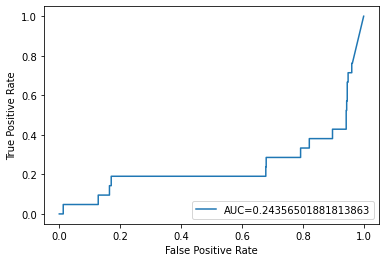

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import random
p = 0.01  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
data = pd.read_csv(
         "classdata.csv",
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

# type = data["type"].value_counts()
# transactions = type.index
# quantity = type.values

# Checking correlation
correlation = data.corr()
# print(correlation["isFraud"].sort_values(ascending=False))

#transform the categorical into numeric
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,"CASH_IN": 3, "TRANSFER": 4,"DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})#string to integers

from sklearn.model_selection import train_test_split
data.drop(['nameOrig','nameDest'],axis=1,inplace=True)
X=data.drop('isFraud',axis=1)
y=data['isFraud']
for i in range(1,7):
    max_X=max(X.iloc[:,i])
    min_X=min(X.iloc[:,i])
    X.iloc[:,i]=(X.iloc[:,i]-min_X)/(max_X-min_X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test_new=np.split(X_test, 2)
Y_cv , Y_test_new=np.split(y_test, 2)

y_train_new=np.zeros(len(y_train))
for i in range (len(y_train)):
    if y_train.iloc[i] == 'Fraud':
        y_train_new[i] =1  
y_train_new=pd.DataFrame(y_train_new)
Y_cv_new=np.zeros(len(Y_cv))
for i in range (len(Y_cv)):
    if Y_cv.iloc[i] == 'Fraud':
        Y_cv_new[i] =1  
Y_test_new_1=np.zeros(len(Y_cv))
for i in range (len(Y_test_new)):
    if Y_test_new.iloc[i] == 'Fraud':
        Y_test_new_1[i] =1
from sklearn.linear_model import LogisticRegression

def generateXvector(X):#add coloumn of 1 in X features
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables.  """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(X+1, 1)
    return theta

def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))
def Logistics_Regression(X,y,learningrate, iterations):
        
    y_new = y
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(len(X.iloc[0,:]))
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
 #Calculate the loss for each training instance
        cost_lst.append(cost_value)
        
    # plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    # plt.title('Cost function Graph')
    # plt.xlabel('Number of iterations')
    # plt.ylabel('Cost')
    return theta, cost_value

theta1, cost_value1=Logistics_Regression(X_train,y_train_new,0.03, 100)
def root_regularization(y_pred,y_test,theta):
    cost_reg=100
    best_lamda=0
    lamda=np.array([0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    cost_lst = []
    m = len(X)
    N = len(y_test)
    for l in range(np.size(lamda)):
        term=(lamda[l]/2*N)*(np.sum(theta**2))
        cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
        cost_lst.append(cost_value)
        if cost_value<cost_reg:
            cost_reg=cost_value
            best_lamda=lamda[l]
    return best_lamda,cost_reg

def rmse(y_pred,y_test):
    cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))
    return cost_value

cost_cv=100
theta1_cv=[]
for j in range(9):#cross validation
    vectorX=generateXvector(X_cv.iloc[:,0:j])
    theta2, cost_value1=Logistics_Regression(X_train.iloc[:,0:j],y_train_new,0.03, 100)
   
    y_pred = sigmoid_function(vectorX.dot(theta2))#calculate hypothesis using best thetas
    best_lamda,cost_reg=root_regularization(y_pred,Y_cv_new,theta2)
    if cost_value1<cost_cv:
        cost_cv=cost_value1
        theta1_cv=theta2
    if cost_reg<cost_cv:
        cost_cv=cost_reg
        theta1_cv=theta2
y_pred_test=sigmoid_function(np.dot(X_test_new.iloc[:,0:np.size(theta1_cv)], theta1_cv))
cost_Y_test=rmse(y_pred_test,Y_test_new_1)
cost_test_reg=rmse(y_pred_test,Y_test_new_1)+(best_lamda/2*len(Y_cv))*(np.sum(theta1_cv**2))
##K fold
from sklearn.linear_model import LogisticRegression
skfolds = KFold(n_splits=10)
splits = skfolds.split(X, y)
for i, (train_index, test_index) in enumerate(splits): #split and shuffle the data  
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = np.mean(y_pred == y_test)
  print(accuracy,'accuracy per iteration')
##stratified
from sklearn.model_selection import StratifiedKFold

skfolds_1 = StratifiedKFold(n_splits=9)
splits_1 = skfolds_1.split(X, y)
for i, (train_index, test_index) in enumerate(splits_1): #split and shuffle the data 
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf_1 = LogisticRegression()
  clf_1.fit(x_train, y_train)
  y_pred_1 = clf_1.predict(x_test)
  accuracy = np.mean(y_pred_1 == y_test)
  print("Accuracy: %.4f"%accuracy)
  print("[SPLIT %d]"%(i+1))
# print("Percentage of digit 9 in the original dataset: %.2f %%"%(np.mean(y==True)*100))
# print("Percentage of digit 9 in the training set: %.2f %%"%(np.mean(y_train==True)*100))
# print("Percentage of digit 9 in the test set: %.2f %%"%(np.mean(y_test==True)*100))
# print("Accuracy: %.4f"%accuracy)
#conv matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics
print(sklearn.metrics.confusion_matrix(Y_test_new_1,np.round((y_pred_test))))
print(accuracy_score(Y_test_new_1, np.round((y_pred_test))) )
##
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
fpr, tpr, _ = metrics.roc_curve(Y_test_new_1,  y_pred_test)#represents the relation between TP and FP
auc = metrics.roc_auc_score(Y_test_new_1, y_pred_test)

#create ROC curve
plt.figure()
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
